In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [40]:
df_coal = pd.read_csv("treated_data/coal_treated.csv", sep = ";", header = 0)
df_coal_month = pd.read_csv("treated_data/coal_month_treated.csv",sep = ";", header=0)

### First Contact

(array([ 7.,  8.,  5.,  8.,  5.,  7.,  4.,  9.,  6., 13.]), array([ 135.45132  ,  323.5517464,  511.6521728,  699.7525992,
        887.8530256, 1075.953452 , 1264.0538784, 1452.1543048,
       1640.2547312, 1828.3551576, 2016.455584 ]), <BarContainer object of 10 artists>)


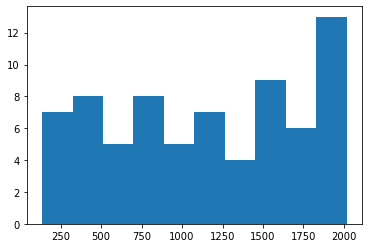

In [41]:
print(plt.hist(df_coal.where(df_coal['Month']==13).dropna()['Value']))

(array([120.,  74., 109.,  72.,  82.,  70., 108., 105.,  89.,  41.]), array([ 11.28761  ,  29.1723306,  47.0570512,  64.9417718,  82.8264924,
       100.711213 , 118.5959336, 136.4806542, 154.3653748, 172.2500954,
       190.134816 ]), <BarContainer object of 10 artists>)


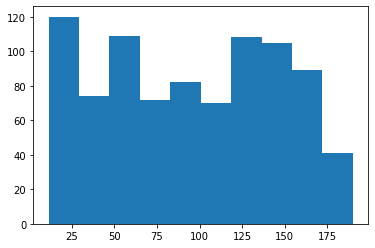

In [42]:
print(plt.hist(df_coal_month['Value']))

Description de la production de charbon: Big picture

count      72.000000
mean     1143.357137
std       600.102975
min       135.451320
25%       626.231222
50%      1197.603718
75%      1690.226140
max      2016.455584
Name: Value, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


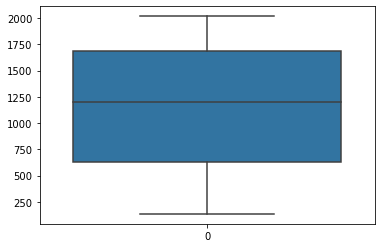

In [43]:
coal_desc = df_coal['Value'].describe()
coal_month_desc = df_coal_month.groupby('Month')['Value'].describe()
print(f'Description de la production de charbon: Big picture\n\n{coal_desc}\n')
print(sns.boxplot(data = df_coal['Value']))

### Production over time

Text(0.5, 1.0, 'Production of Coal in the US - annual')

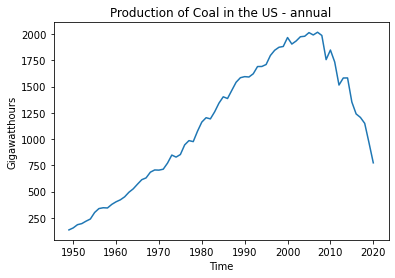

In [53]:
#Evolution
plot = sns.lineplot(x = 'Year', y = 'Value', data = df_coal)
plot.set_ylabel('Gigawatthours')
plot.set_xlabel('Time')
plot.set_title('Production of Coal in the US - annual')

Text(0.5, 1.0, 'Production of Coal in the US - monthly')

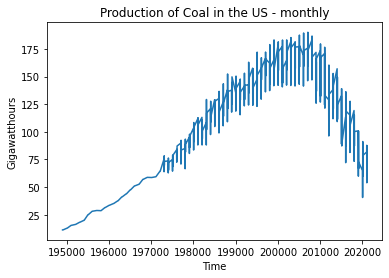

In [51]:
#Detailed evolution
plot = sns.lineplot(x = 'YYYYMM', y = 'Value', data = df_coal_month)
plot.set_ylabel('Gigawatthours')
plot.set_xlabel('Time')
plot.set_title('Production of Coal in the US - monthly')

### Descriptive statistiques in-between months

Distribuition des statistiques descriptives parmis les mois:

       count           mean           std       min           25%  \
Month                                                               
1.0     73.0  102035.560272  54864.240621  11287.61  52540.280250   
2.0     73.0   90926.607162  46916.996022  11287.61  52540.280250   
3.0     73.0   90297.802340  47240.495034  11287.61  51122.900000   
4.0     73.0   83169.378628  41932.622102  11287.61  51122.900000   
5.0     73.0   88454.360477  45704.180651  11287.61  51122.900000   
6.0     73.0   97226.971121  51644.345925  11287.61  52540.280250   
7.0     72.0  106944.655650  58390.614562  11287.61  52185.935187   
8.0     72.0  106688.300345  58276.822392  11287.61  52185.935187   
9.0     72.0   94978.694262  49679.498181  11287.61  52185.935187   
10.0    72.0   91186.962303  47262.786254  11287.61  52185.935187   
11.0    72.0   90715.768859  46471.669021  11287.61  52185.935187   
12.0    72.0   99131.245303  52995.422145

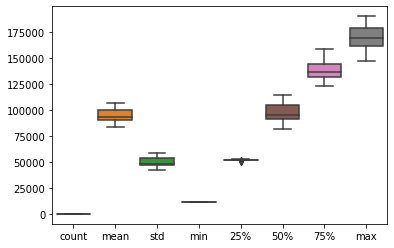

In [120]:
print(f'Distribuition des statistiques descriptives parmis les mois:\n\n{coal_month_desc[:12]}\n\n')
print(sns.boxplot(data=coal_month_desc[:12]))

<AxesSubplot:xlabel='Month', ylabel='Value'>

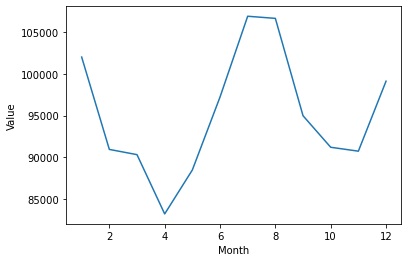

In [121]:
#Variation saisonnière
sns.lineplot(x='Month', y = 'Value', data = df_coal_month.groupby('Month').mean())

In [122]:
#Monthy production description
#month_name= {	1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',
#		9:'September',10:'October',11:'November',12:'December'}

#for month in range(1,12,1):
#    data = df_coal_month.where(df_coal_month['Month']==month).dropna()
#    print(f'Statistique descriptive du mois {month_name[month]}')
#    print(sns.boxplot(data = data['Value']))

les boxplots n'ont pas montré utilité dans notre analyse